In [ ]:
#!git clone https://github.com/zhouhaoyi/ETDataset.git
#!git clone https://github.com/RL-NAS-TSF4E/RL-NAS-TSF4E.git

import sys
if not '/content/RL-NAS-TSF4E' in sys.path:
    sys.path += ['/content/RL-NAS-TSF4E']

Cloning into 'RL-NAS-TSF4E'...
remote: Enumerating objects: 549, done.
remote: Counting objects: 100% (250/250), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 549 (delta 165), reused 171 (delta 110), pack-reused 299
Receiving objects: 100% (549/549), 436.97 MiB | 23.59 MiB/s, done.
Resolving deltas: 100% (251/251), done.


In [ ]:
import numpy as np
import pickle
from collections import Counter

import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns

#Learning behaviour of the optimization approaches

In [ ]:
with open('/content/RL-NAS-TSF4E/results/optuna/optuna_actions_mae.pkl', 'rb') as file:
    optuna_actions_mae = pickle.load(file)
with open('/content/RL-NAS-TSF4E/results/a2c/a2c_actions_mae.pkl', 'rb') as file:
    a2c_actions_mae = pickle.load(file)
with open('/content/RL-NAS-TSF4E/results/ppo/ppo_actions_mae.pkl', 'rb') as file:
    ppo_actions_mae = pickle.load(file)

agents_data = {
    "optuna": optuna_actions_mae,
    "a2c": a2c_actions_mae,
    "ppo": ppo_actions_mae
}

elements_lists = {}

for agent, agent_data in agents_data.items():
    elements_lists[agent] = [[] for _ in range(7)]
    for item in agent_data:
        for i in range(7):
            elements_lists[agent][i].append(item[0][i])

optuna_first_elements, optuna_second_elements, optuna_third_elements, \
optuna_fourth_elements, optuna_fifth_elements, optuna_sixth_elements, \
optuna_seventh_elements = elements_lists["optuna"]

a2c_first_elements, a2c_second_elements, a2c_third_elements, \
a2c_fourth_elements, a2c_fifth_elements, a2c_sixth_elements, \
a2c_seventh_elements = elements_lists["a2c"]

ppo_first_elements, ppo_second_elements, ppo_third_elements, \
ppo_fourth_elements, ppo_fifth_elements, ppo_sixth_elements, \
ppo_seventh_elements = elements_lists["ppo"]

def plot_cumulative_frequency(elements_list):
    fig, axs = plt.subplots(1, len(elements_list), figsize=(21, 5))  # Arrange subplots horizontally
    for idx, (elements, title) in enumerate(zip(elements_list, ['A', 'B', 'C'])):
        unique_values = sorted(set(elements))
        value_to_type = {v: i+1 for i, v in enumerate(unique_values)}
        typed_data = [value_to_type[v] for v in elements]
        type_counts = {i: np.zeros(500) for i in range(1, len(unique_values) + 1)}
        for i in range(1, 501):
            for j in range(1, len(unique_values) + 1):
                type_counts[j][i-1] = type_counts[j][i-2] + (typed_data[i-1] == j if i > 1 else typed_data[i-1] == j)
        axs[idx].set_title(f'{title}')
        axs[idx].set_xlabel('Iteration')
        axs[idx].set_ylabel('Cumulative Frequency')
        for t in type_counts:
            axs[idx].plot(range(1, 501), type_counts[t], label=f'specification {t}')
        axs[idx].legend(facecolor='none', framealpha=0.5, edgecolor='grey')
        axs[idx].grid(True, color='grey', linestyle='-.', linewidth=0.75)
        axs[idx].set_facecolor('white')
        for spine in axs[idx].spines.values():
            spine.set_edgecolor('grey')
    plt.tight_layout()  # Automatic layout adjustment
    plt.show()

In [ ]:
# Function to print elements and their frequencies
def print_element_frequencies(elements, description):
    counter = Counter(elements)
    print(f"{description} Frequencies:")
    for element, frequency in counter.items():
        print(f"Element: {element}, Frequency: {frequency}")
    print()

# Elements and their descriptions
data_sets = [
    (optuna_first_elements, "Optuna First Elements (e_layers)"),
    (optuna_second_elements, "Optuna Second Elements (d_layers)"),
    (optuna_third_elements, "Optuna Third Elements (dropout)"),
    (optuna_fourth_elements, "Optuna Fourth Elements"),
    (optuna_fifth_elements, "Optuna Fifth Elements"),
    (optuna_sixth_elements, "Optuna Sixth Elements (d_model)"),
    (optuna_seventh_elements, "Optuna Seventh Elements (d_ff)"),
    (a2c_first_elements, "A2C First Elements (e_layers)"),
    (a2c_second_elements, "A2C Second Elements (d_layers)"),
    (a2c_third_elements, "A2C Third Elements (dropout)"),
    (a2c_fourth_elements, "A2C Fourth Elements"),
    (a2c_fifth_elements, "A2C Fifth Elements"),
    (a2c_sixth_elements, "A2C Sixth Elements (d_model)"),
    (a2c_seventh_elements, "A2C Seventh Elements (d_ff)"),
    (ppo_first_elements, "PPO First Elements (e_layers)"),
    (ppo_second_elements, "PPO Second Elements (d_layers)"),
    (ppo_third_elements, "PPO Third Elements (dropout)"),
    (ppo_fourth_elements, "PPO Fourth Elements"),
    (ppo_fifth_elements, "PPO Fifth Elements"),
    (ppo_sixth_elements, "PPO Sixth Elements (d_model)"),
    (ppo_seventh_elements, "PPO Seventh Elements (d_ff)")
]

# Print frequencies for all data sets
for elements, description in data_sets:
    print_element_frequencies(elements, description)

Optuna First Elements Frequencies:
Element: 3.0, Frequency: 12
Element: 1.0, Frequency: 437
Element: 5.0, Frequency: 8
Element: 2.0, Frequency: 27
Element: 4.0, Frequency: 10
Element: 6.0, Frequency: 6

Optuna Second Elements Frequencies:
Element: 4.0, Frequency: 18
Element: 3.0, Frequency: 20
Element: 2.0, Frequency: 42
Element: 1.0, Frequency: 327
Element: 5.0, Frequency: 26
Element: 6.0, Frequency: 67

Optuna Third Elements Frequencies:
Element: 0.15, Frequency: 131
Element: 0.05, Frequency: 23
Element: 0.1, Frequency: 324
Element: 0.0, Frequency: 22

Optuna Fourth Elements Frequencies:
Element: 7.0, Frequency: 8
Element: 5.0, Frequency: 16
Element: 4.0, Frequency: 35
Element: 6.0, Frequency: 9
Element: 3.0, Frequency: 427
Element: 8.0, Frequency: 5

Optuna Fifth Elements Frequencies:
Element: 5.0, Frequency: 11
Element: 7.0, Frequency: 42
Element: 8.0, Frequency: 422
Element: 6.0, Frequency: 20
Element: 4.0, Frequency: 5

Optuna Sixth Elements Frequencies:
Element: 512.0, Frequency

##e_layers

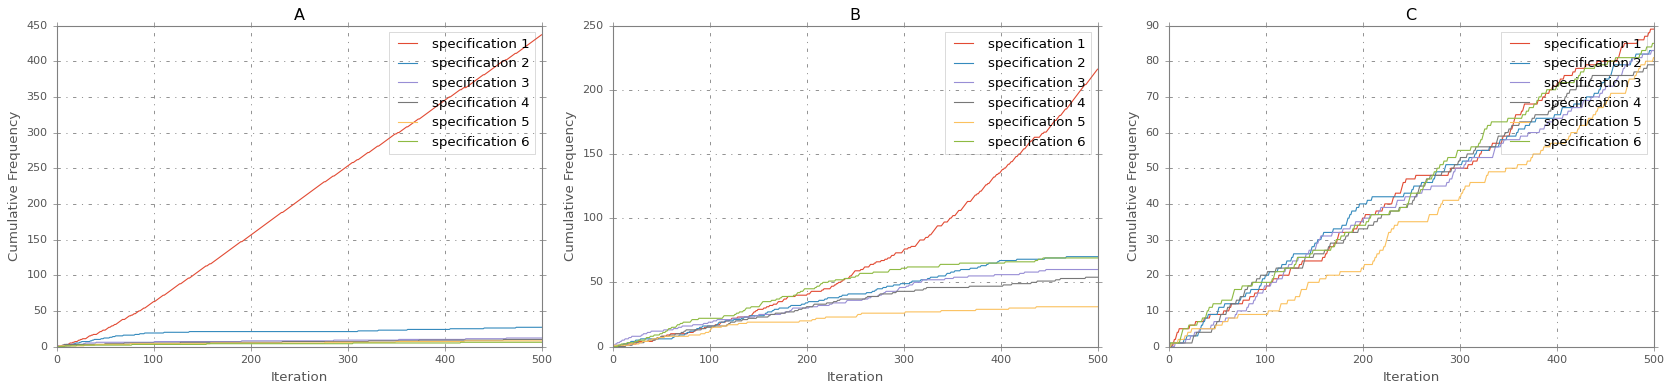

In [ ]:
plot_cumulative_frequency([optuna_first_elements, a2c_first_elements, ppo_first_elements])

In [ ]:
optuna_first_elements

##d_layers

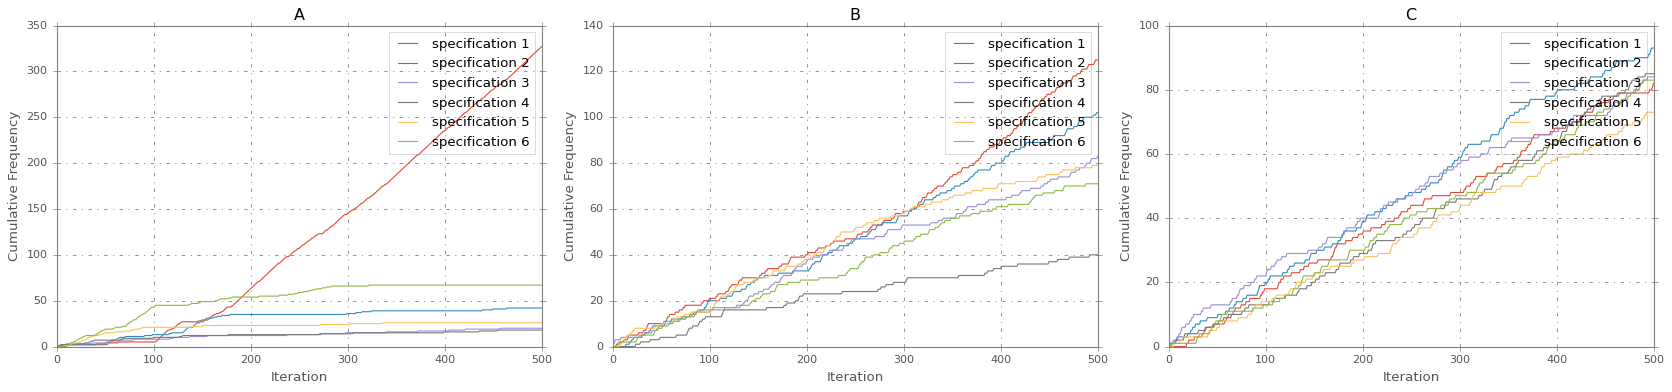

In [ ]:
plot_cumulative_frequency([optuna_second_elements, a2c_second_elements, ppo_second_elements])

## dropout

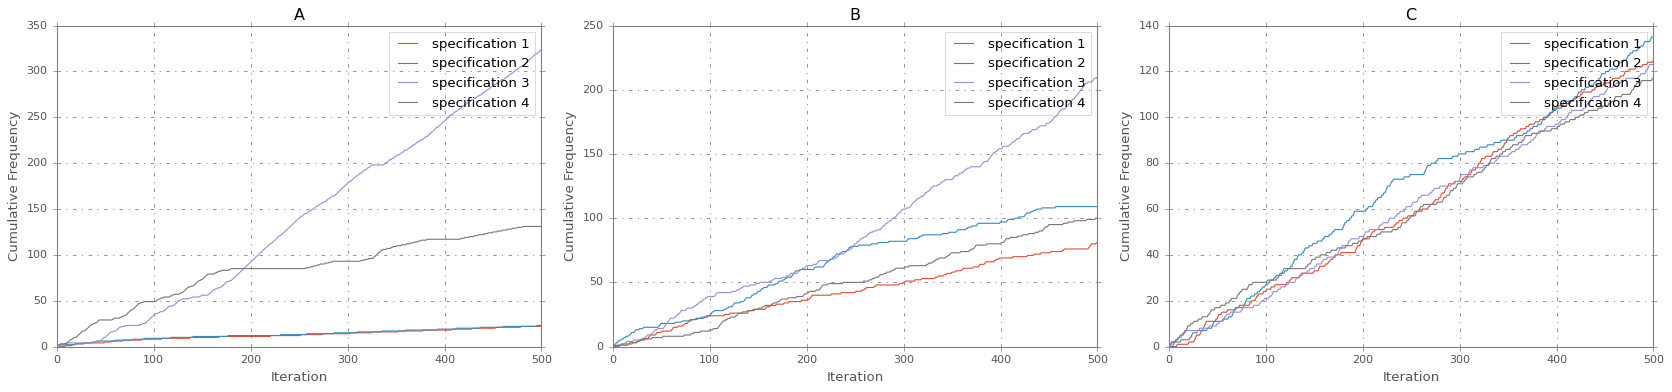

In [ ]:
plot_cumulative_frequency([optuna_third_elements, a2c_third_elements, ppo_third_elements])

##probsparse

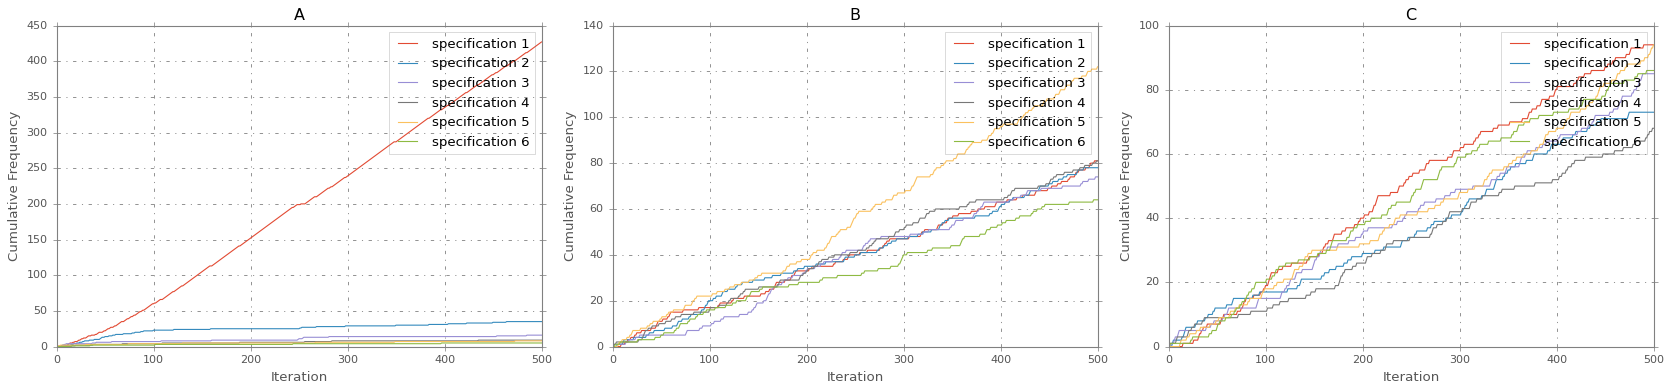

In [ ]:
plot_cumulative_frequency([optuna_fourth_elements, a2c_fourth_elements, ppo_fourth_elements])

##attention heads

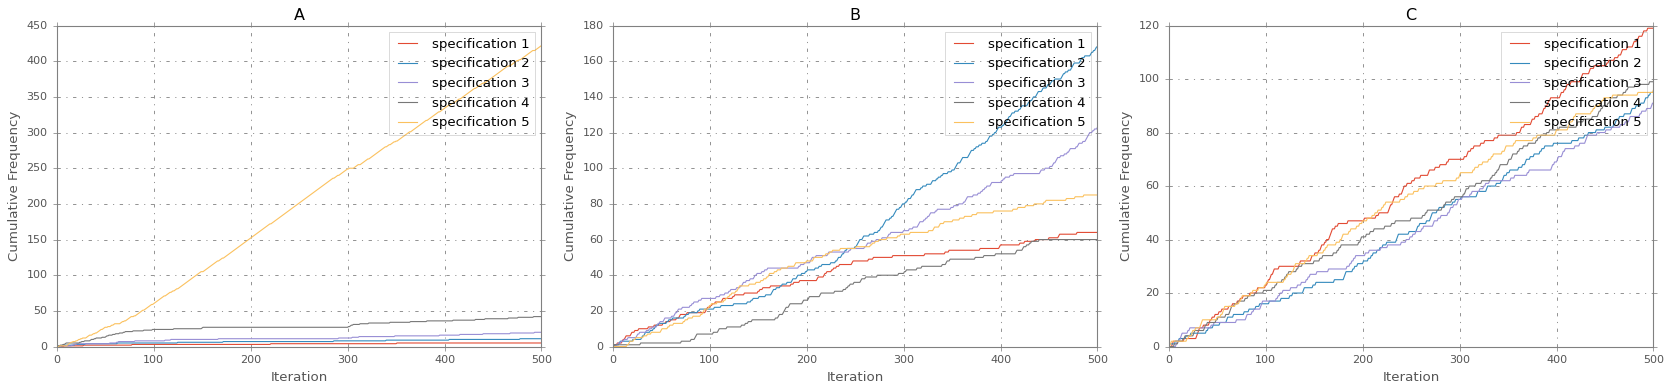

In [ ]:
plot_cumulative_frequency([optuna_fifth_elements, a2c_fifth_elements, ppo_fifth_elements])

##d_model

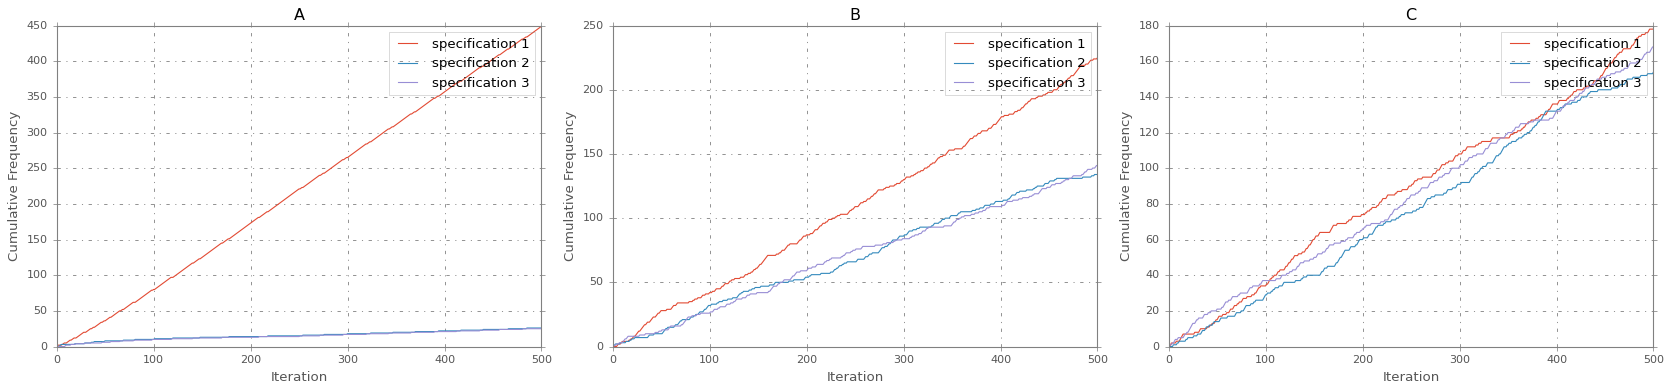

In [ ]:
plot_cumulative_frequency([optuna_sixth_elements, a2c_sixth_elements, ppo_sixth_elements])

##d_ff

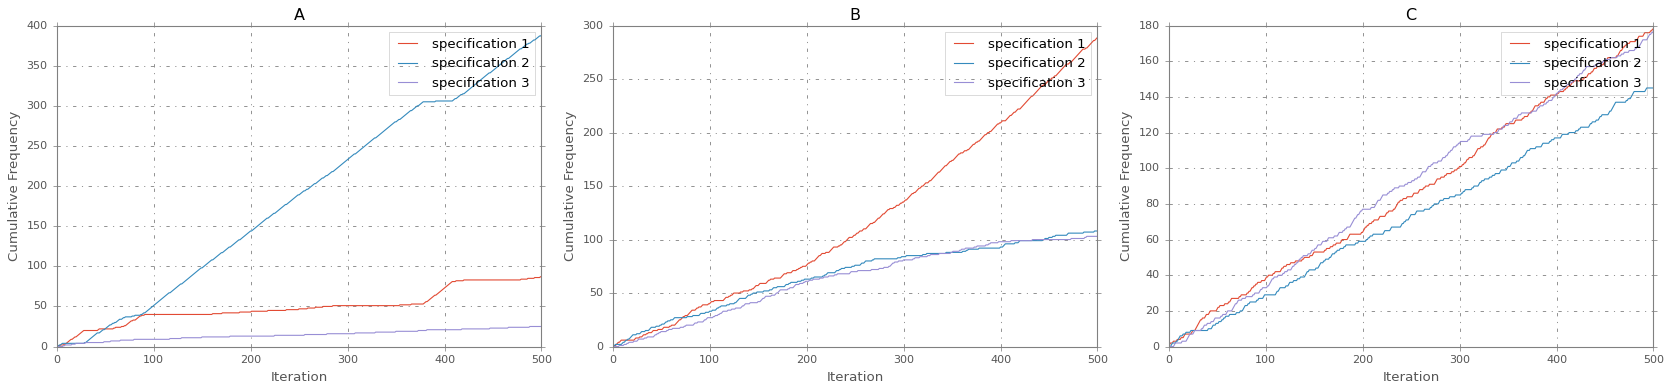

In [ ]:
plot_cumulative_frequency([optuna_seventh_elements, a2c_seventh_elements, ppo_seventh_elements])

#Static quality criteria

In [ ]:
default_metrics = np.load('/content/RL-NAS-TSF4E/results/default/metrics.npy')
optuna_metrics = np.load('/content/RL-NAS-TSF4E/results/optuna/optuna_metrics.npy')
ppo_metrics = np.load('/content/RL-NAS-TSF4E/results/ppo/ppo_metrics.npy')
a2c_metrics = np.load('/content/RL-NAS-TSF4E/results/a2c/a2c_metrics.npy')

# Define the metric names
metric_names = ["MAE", "MSE", "RMSE", "MAPE", "MSPE"]

# Define the method names and their corresponding metrics
methods = {
    "Default": default_metrics,
    "Optuna": optuna_metrics,
    "PPO": ppo_metrics,
    "A2C": a2c_metrics
}

# Output the metrics with descriptions
for method, metrics in methods.items():
    print(f"Method: {method}")
    for name, value in zip(metric_names, metrics):
        print(f"{name}: {value}")
    print()  # Blank line for better readability between methods

Method: Default
MAE: 0.6008118987083435
MSE: 0.6650274395942688
RMSE: 0.8154921531677246
MAPE: 12.475324630737305
MSPE: 57367.4375

Method: Optuna
MAE: 0.5463150143623352
MSE: 0.6423419117927551
RMSE: 0.8014623522758484
MAPE: 13.149218559265137
MSPE: 64405.2890625

Method: PPO
MAE: 0.5697609186172485
MSE: 0.659470796585083
RMSE: 0.812078058719635
MAPE: 13.525444984436035
MSPE: 69093.3671875

Method: A2C
MAE: 0.5864141583442688
MSE: 0.7051711082458496
RMSE: 0.8397446870803833
MAPE: 11.172039985656738
MSPE: 44698.23046875



#Vizualisation of the temporal Patterns with respect to the optimization approach

In [ ]:
ppo_preds = np.load('/content/RL-NAS-TSF4E/results/ppo/ppo_pred.npy')
a2c_preds = np.load('/content/RL-NAS-TSF4E/results/a2c/a2c_pred.npy')
optuna_preds = np.load('/content/RL-NAS-TSF4E/results/optuna/optuna_pred.npy')
default_preds = np.load('/content/RL-NAS-TSF4E/results/default/pred.npy')
trues = np.load('/content/RL-NAS-TSF4E/results/default/true.npy')

In [ ]:
def plot_residuals_and_predictions(trues, default_preds, optuna_preds, a2c_preds, ppo_preds, channel):
    """
    Plot residuals and predictions for a given channel.

    Parameters:
    - trues: np.ndarray, ground truth values.
    - default_preds: np.ndarray, default method predictions.
    - optuna_preds: np.ndarray, Optuna method predictions.
    - a2c_preds: np.ndarray, A2C method predictions.
    - ppo_preds: np.ndarray, PPO method predictions.
    - channel: int, channel index to plot.
    """

    # Define the step size and indices
    step = 24
    indices = range(0, 168, step)

    # Define the methods and their corresponding predictions
    methods = {
        "Default": default_preds,
        "Optuna": optuna_preds,
        "A2C": a2c_preds,
        "PPO": ppo_preds
    }

    # Initialize empty dictionaries to store combined arrays and residuals
    combined_arrays = {method: [] for method in methods}
    residuals = {method: [] for method in methods}

    # Run through a loop and create the combined arrays for the given channel
    for method, preds in methods.items():
        temp_arrays = [preds[index, :, channel] for index in indices]
        combined_arrays[method] = np.concatenate(temp_arrays, axis=0)
        residuals[method] = combined_arrays[method] - np.concatenate([trues[index, :, channel] for index in indices], axis=0)

    combined_array_trues = np.concatenate([trues[index, :, channel] for index in indices], axis=0)

    # Plotting
    fig, axes = plt.subplots(6, 1, figsize=(10, 14), gridspec_kw={'height_ratios': [1, 1.75, 1, 1.75, 1, 1.75]})

    # Panel titles and plotting order
    panels = [("Default", "Optuna"), ("Default", "A2C"), ("Default", "PPO")]
    for i, (method1, method2) in enumerate(panels):
        residual_ax = axes[2*i]
        plot_ax = axes[2*i + 1]

        # Plot residuals
        residual_ax.bar(range(len(residuals[method1])), residuals[method1], color='skyblue', alpha=0.65, label=f'{method1} Residuals')
        residual_ax.bar(range(len(residuals[method2])), residuals[method2], color='firebrick', alpha=0.65, label=f'{method2} Residuals')
        residual_ax.legend(facecolor='none', framealpha=0.5)
        residual_ax.set_title(f'Panel {chr(65 + i)}', fontsize=12)
        residual_ax.set_facecolor('white')

        # Plot predictions
        plot_ax.plot(combined_arrays[method1], label=f'{method1}_prediction')
        plot_ax.plot(combined_arrays[method2], label=f'{method2}_prediction')
        plot_ax.plot(combined_array_trues, label='Groundtruth')
        plot_ax.legend(facecolor='none', framealpha=0.5)
        plot_ax.set_facecolor('white')

    plt.tight_layout()
    #plt.suptitle(f'Channel {channel}', fontsize=16, y=1.02)
    plt.show()

##Oil Temperature (OT) - 1 Week

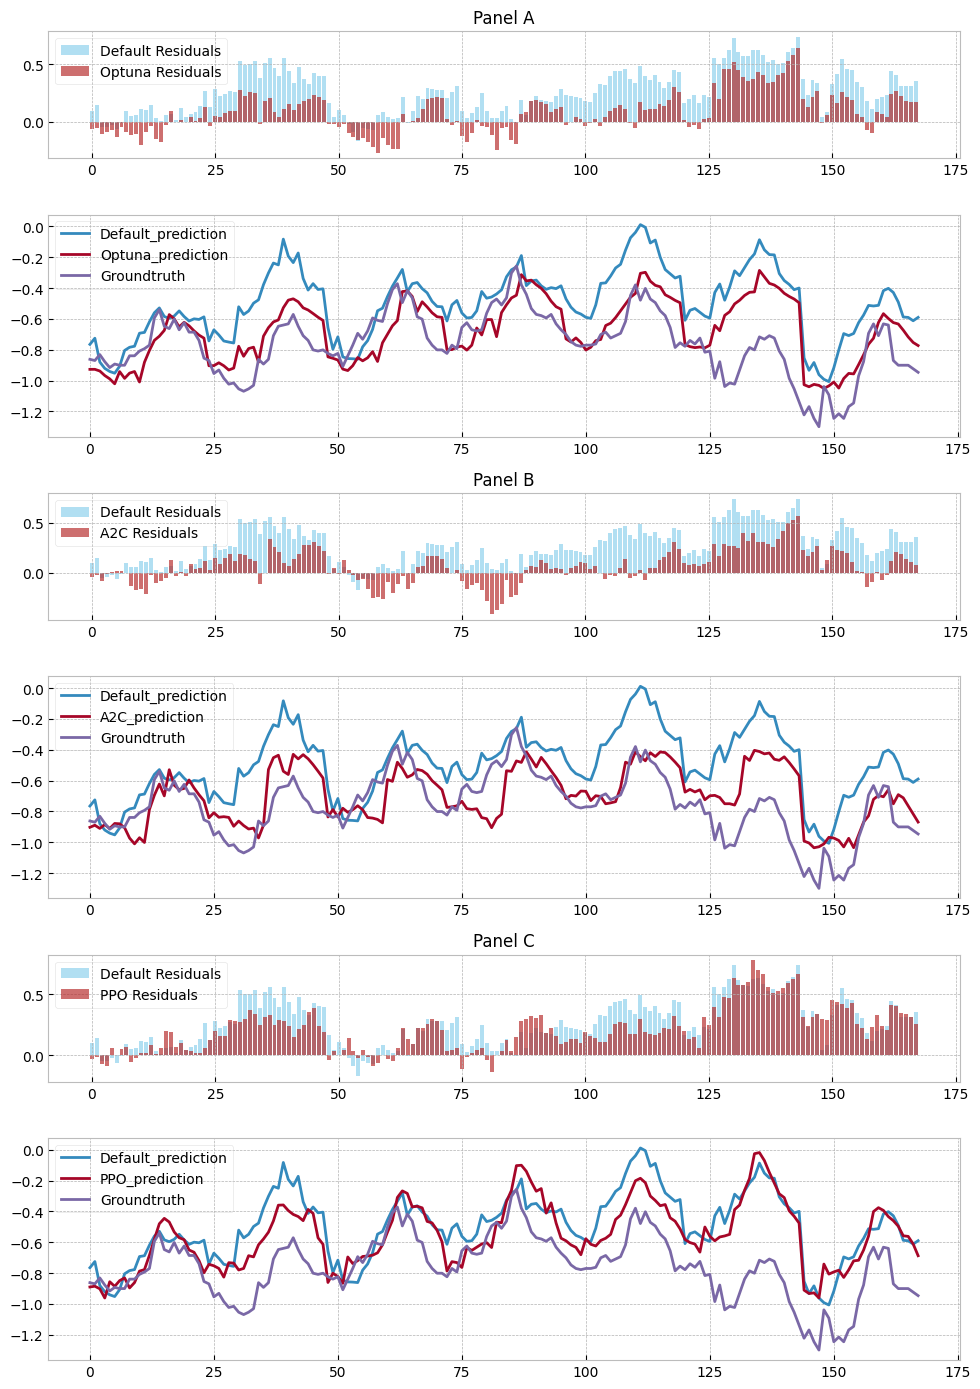

In [ ]:
plot_residuals_and_predictions(trues, default_preds, optuna_preds, a2c_preds, ppo_preds, -1)

##High UseFul Load (HUFL) - 1 Week

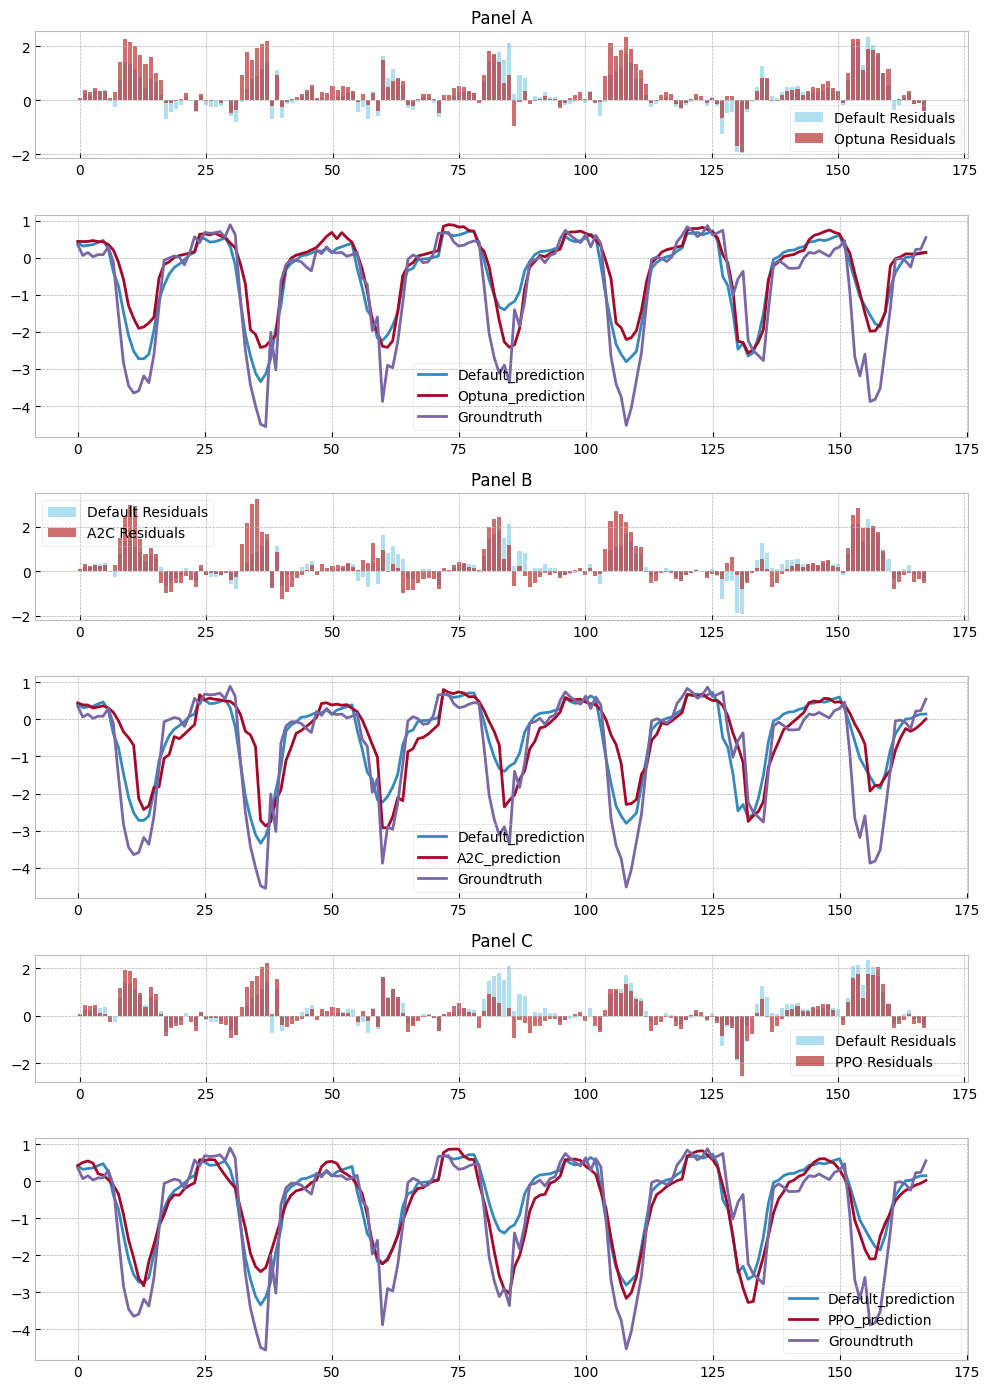

In [ ]:
plot_residuals_and_predictions(trues, default_preds, optuna_preds, a2c_preds, ppo_preds, 0)

##High UseLess Load (HULL) - 1 Week

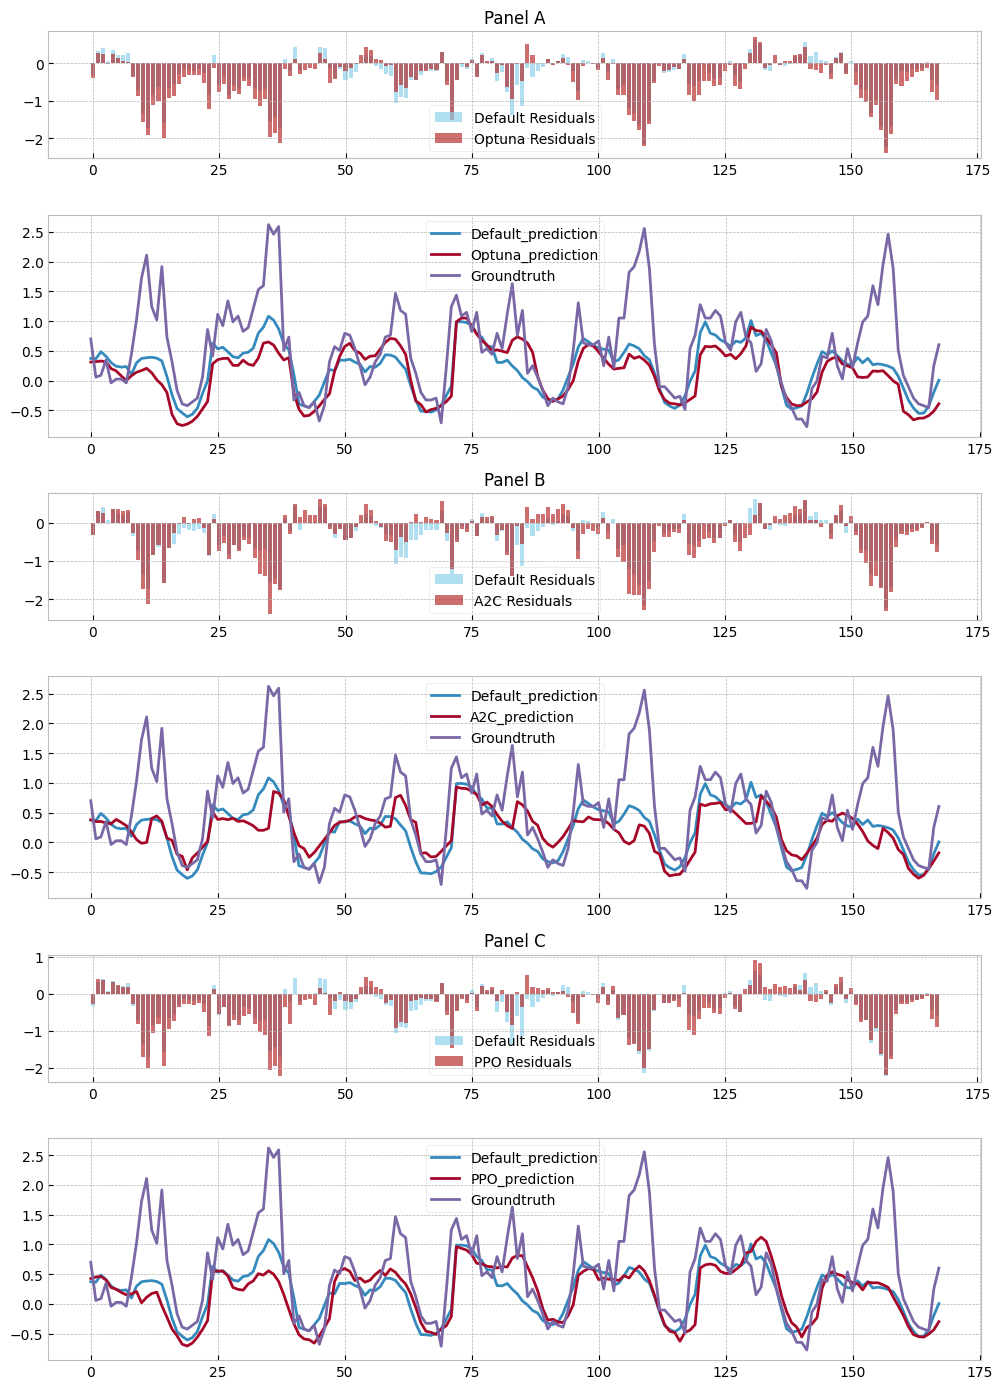

In [ ]:
plot_residuals_and_predictions(trues, default_preds, optuna_preds, a2c_preds, ppo_preds, 1)

##Middle UseFul Load (MUFL) - 1 Week

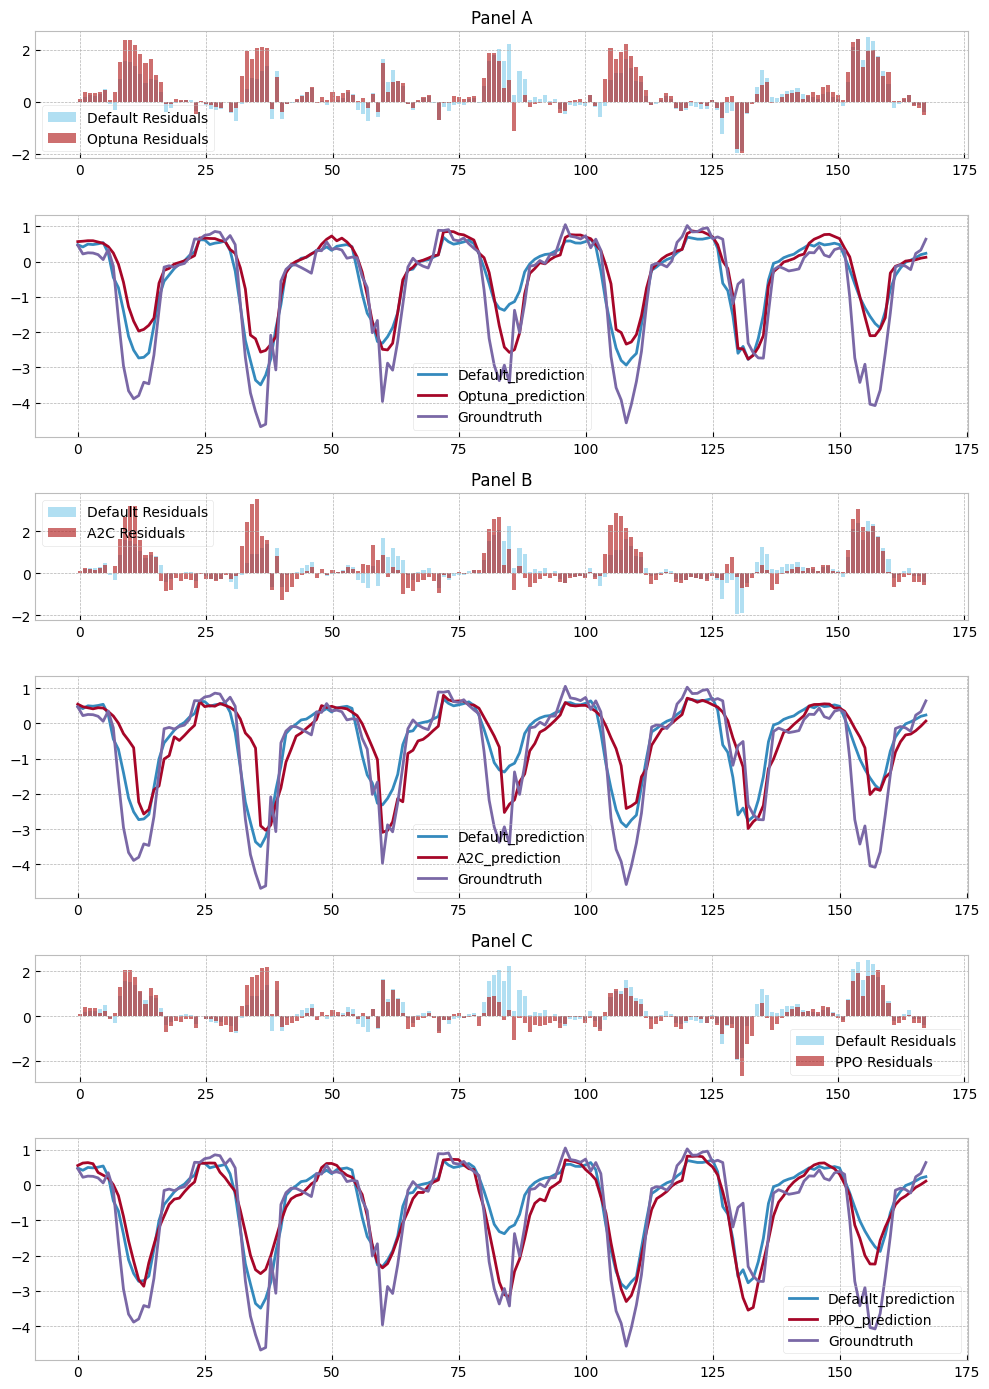

In [ ]:
plot_residuals_and_predictions(trues, default_preds, optuna_preds, a2c_preds, ppo_preds, 2)

##Middle UseLess Load (MULL) - 1 Week

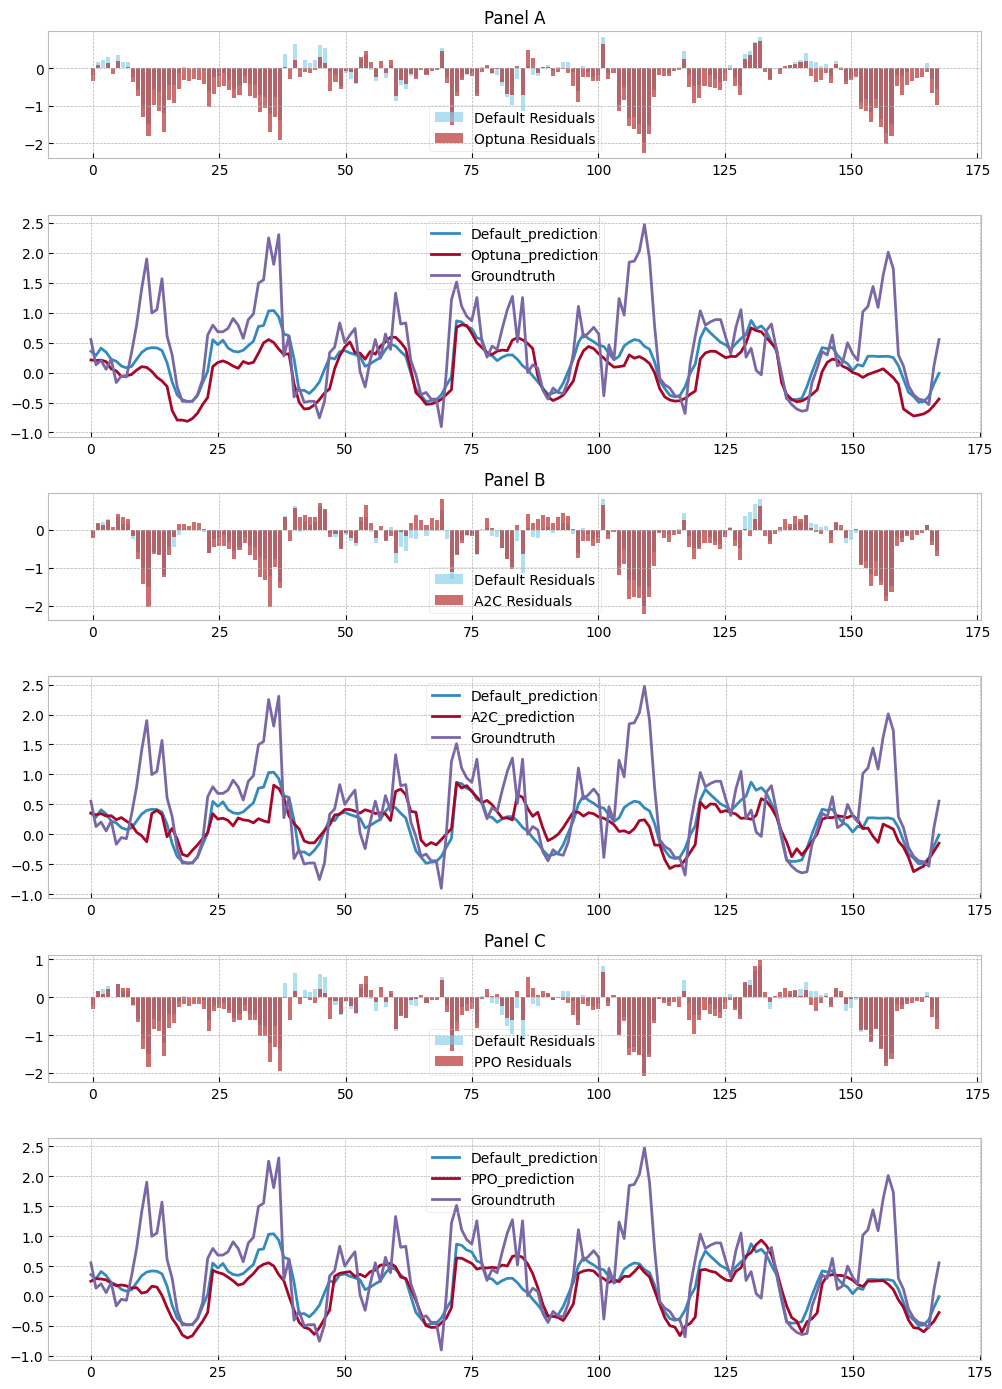

In [ ]:
plot_residuals_and_predictions(trues, default_preds, optuna_preds, a2c_preds, ppo_preds, 3)

##Low UseFul Load (LUFL) - 1 Week

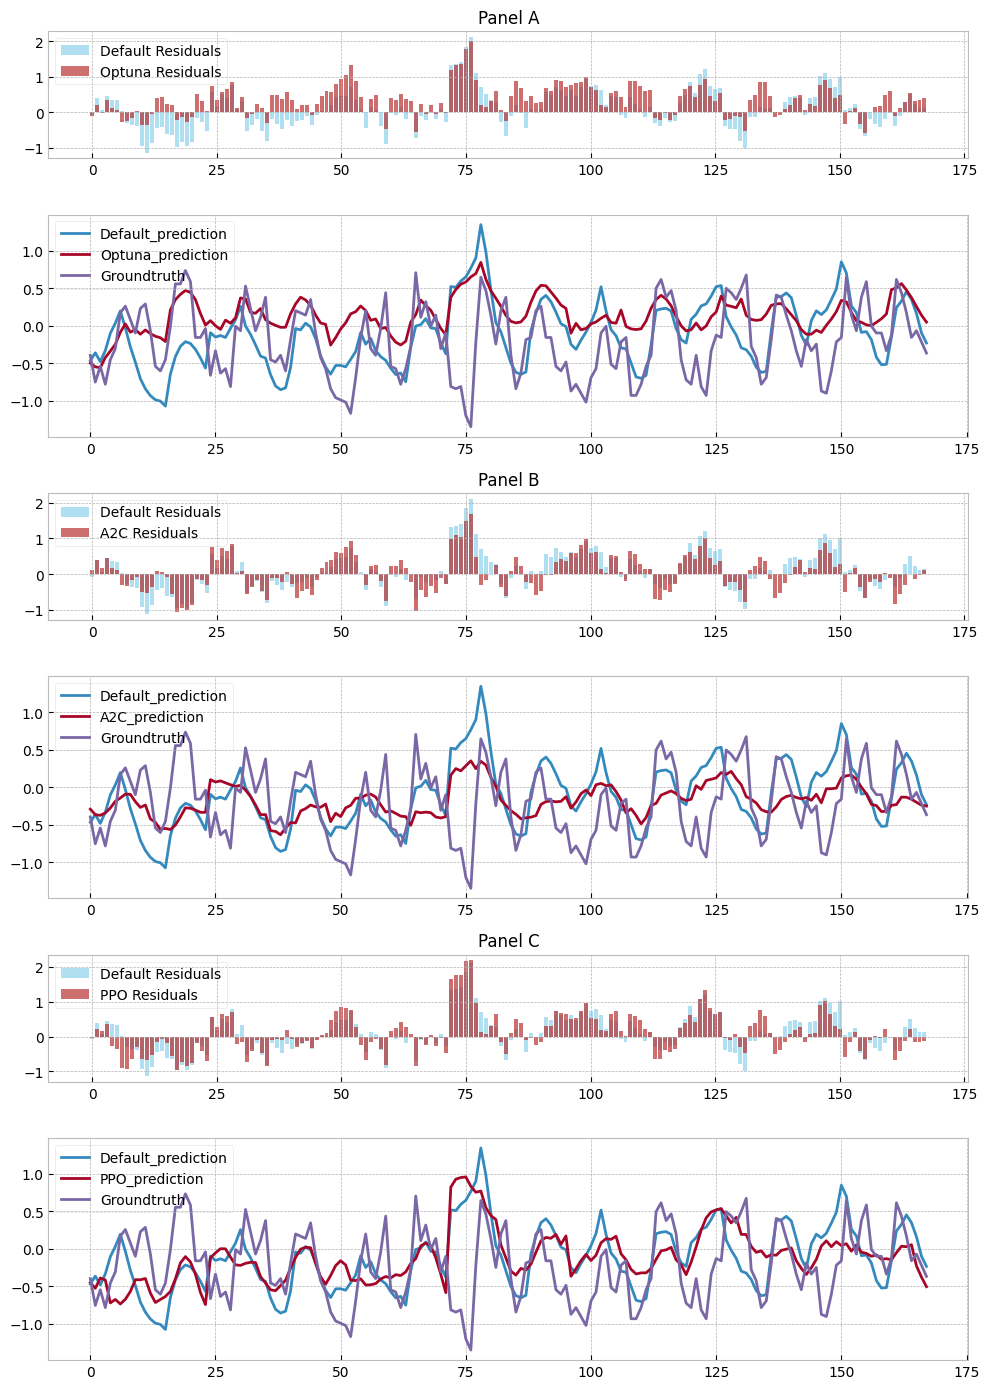

In [ ]:
plot_residuals_and_predictions(trues, default_preds, optuna_preds, a2c_preds, ppo_preds, 4)

##Low UseLess Load (LULL) - 1 Week

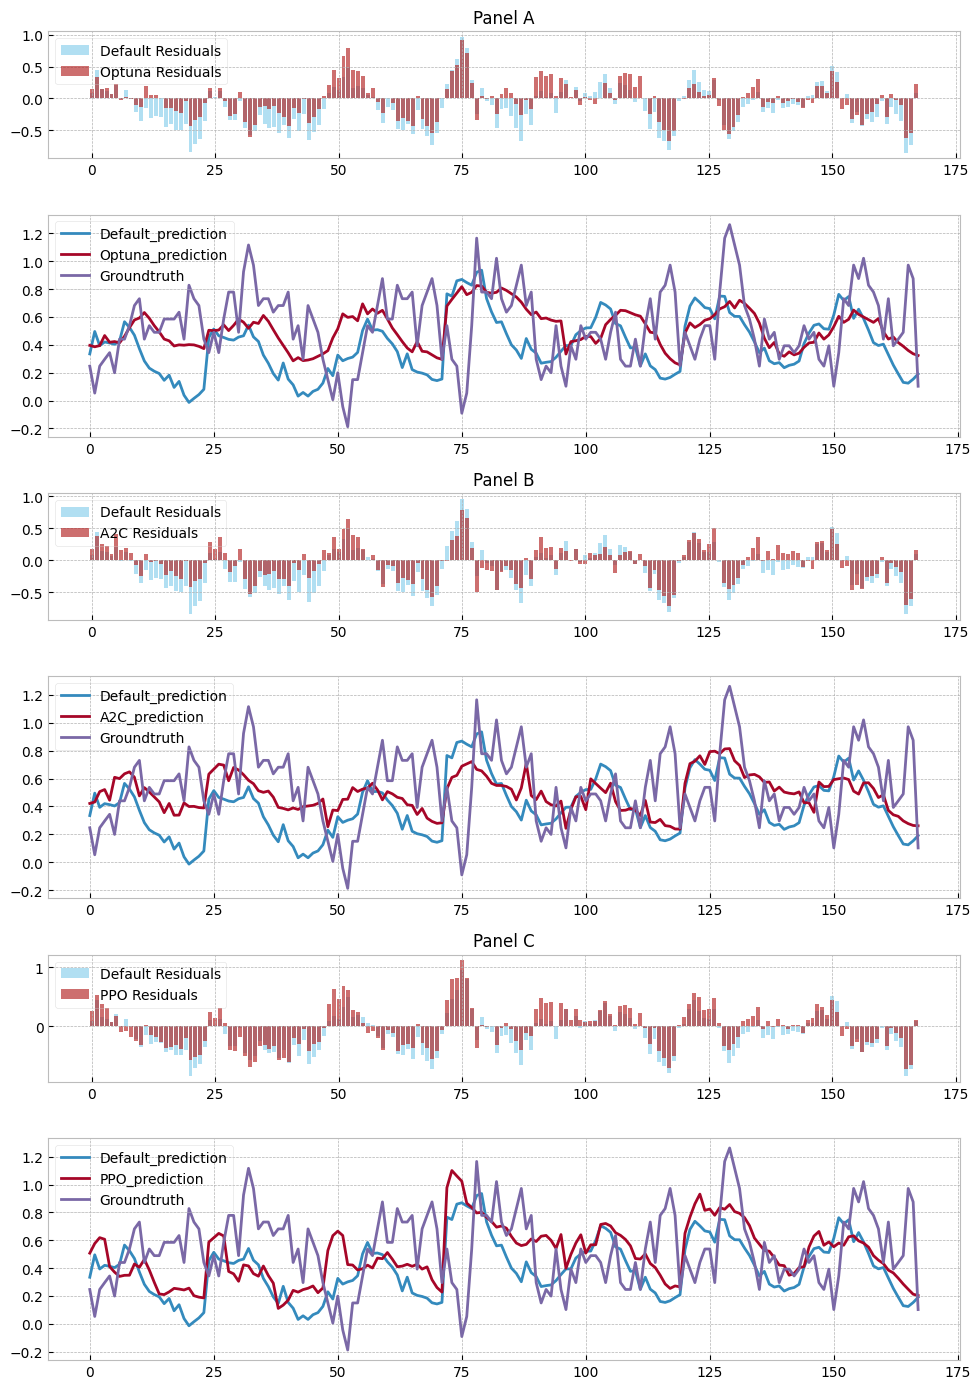

In [ ]:
plot_residuals_and_predictions(trues, default_preds, optuna_preds, a2c_preds, ppo_preds, 5)